# Name--> T.Bhanu Prakash 
# JNTU NO-->20341A05H8
# mail id-->20341A05H8@gmrit.edu.in

In [175]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import scipy.stats as stats

In [176]:
df=pd.read_csv(r"C:\Users\samba\OneDrive\Desktop\OneDrive_2023-03-20\Data Wrangling Contest\planes.csv")

In [177]:
#df=df.drop(['speed'], axis=1)

In [178]:
df.shape

(3322, 9)

In [179]:
df.isnull().sum()

tailnum            0
year              70
type               0
manufacturer       0
model              0
engines            0
seats              0
speed           3299
engine             0
dtype: int64

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3322 non-null   object 
 1   year          3252 non-null   float64
 2   type          3322 non-null   object 
 3   manufacturer  3322 non-null   object 
 4   model         3322 non-null   object 
 5   engines       3322 non-null   int64  
 6   seats         3322 non-null   int64  
 7   speed         23 non-null     float64
 8   engine        3322 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 233.7+ KB


In [181]:
df.isnull().sum().any()

True

In [182]:
df['year']

0       2004.0
1       1998.0
2       1999.0
3       1999.0
4       2002.0
         ...  
3317    2002.0
3318    1992.0
3319    2002.0
3320    1992.0
3321    1992.0
Name: year, Length: 3322, dtype: float64

In [183]:
df

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


# question -1
### SELECT DISTINCT engine FROM planes

In [184]:
l=list(df['engine'].unique())
print(l)

['Turbo-fan', 'Turbo-jet', 'Reciprocating', '4 Cycle', 'Turbo-shaft', 'Turbo-prop']


# question-2
### SELECT DISTINCT type, engine FROM planes

In [185]:
det = pd.concat([df['engine'], df['type']], join = 'outer', axis = 1)
det

,engine,type
0,Turbo-fan,Fixed wing multi engine
1,Turbo-fan,Fixed wing multi engine
2,Turbo-fan,Fixed wing multi engine
3,Turbo-fan,Fixed wing multi engine
4,Turbo-fan,Fixed wing multi engine
...,...,...
3317,Turbo-fan,Fixed wing multi engine
3318,Turbo-fan,Fixed wing multi engine
3319,Turbo-fan,Fixed wing multi engine
3320,Turbo-jet,Fixed wing multi engine


In [195]:
res=df[det.columns].apply(lambda x : ','.join(x.dropna().astype(str)),axis=1)
x=list(res.unique())
lst=[]
lst1=[]
for i in x:
    ind=i.index(',')
    lst.append(i[:ind])
    lst1.append(i[ind+1:])
print(lst1)
print(lst)


['Fixed wing multi engine', 'Fixed wing multi engine', 'Fixed wing single engine', 'Fixed wing multi engine', 'Fixed wing single engine', 'Rotorcraft', 'Fixed wing multi engine']
['Turbo-fan', 'Turbo-jet', 'Reciprocating', 'Reciprocating', '4 Cycle', 'Turbo-shaft', 'Turbo-prop']


In [196]:
l3=pd.DataFrame()
l3['type']=lst
l3['engine']=lst1
l3

,type,engine
0,Turbo-fan,Fixed wing multi engine
1,Turbo-jet,Fixed wing multi engine
2,Reciprocating,Fixed wing single engine
3,Reciprocating,Fixed wing multi engine
4,4 Cycle,Fixed wing single engine
5,Turbo-shaft,Rotorcraft
6,Turbo-prop,Fixed wing multi engine


# question-3 

In [188]:
temp=list(df['engine'].unique())
x=list(df['engine'])
cnt=[]
for i in l:
    cnt.append(x.count(i))
l3=pd.DataFrame()
l3['engine']=temp
l3['count']=cnt
l3

,engine,count
0,Turbo-fan,2750
1,Turbo-jet,535
2,Reciprocating,28
3,4 Cycle,2
4,Turbo-shaft,5
5,Turbo-prop,2


# question-4

In [307]:
e =[]
t=[]
for type1, engine in df[["type","engine"]].values:
    setk.append(type1+" "+ engine)
dicv={}
l2=[]
l3=[]

In [308]:
from collections import Counter 
b=Counter(setk)


In [318]:
x=df.groupby(['engine', 'type']).size()
pd.DataFrame(x)

0
engine        type                          
4 Cycle       Fixed wing single engine     2
Reciprocating Fixed wing multi engine      5
              Fixed wing single engine    23
Turbo-fan     Fixed wing multi engine   2750
Turbo-jet     Fixed wing multi engine    535
Turbo-prop    Fixed wing multi engine      2
Turbo-shaft   Rotorcraft                   5

# question-5

In [408]:
l=['engine','manufacturer']
temp=['min', 'mean', 'max']
dic={'year': temp}
res=df.groupby(l)
res.agg(dic)
#print(res.agg(dic).describe())
print(df.describe())

              year      engines        seats        speed
count  3322.000000  3322.000000  3322.000000  3322.000000
mean   2000.494883     1.995184   154.316376     1.639374
std       7.117596     0.117593    73.654974    23.112297
min    1956.000000     1.000000     2.000000     0.000000
25%    1997.000000     2.000000   140.000000     0.000000
50%    2001.000000     2.000000   149.000000     0.000000
75%    2005.000000     2.000000   182.000000     0.000000
max    2013.000000     4.000000   450.000000   432.000000


In [409]:
res.agg(dic)

year                     
                                                min         mean     max
engine        manufacturer                                              
4 Cycle       CESSNA                         1975.0  1975.000000  1975.0
              JOHN G HESS                    2001.0  2001.000000  2001.0
Reciprocating AMERICAN AIRCRAFT INC          2001.0  2001.000000  2001.0
              AVIAT AIRCRAFT INC             2007.0  2007.000000  2007.0
              BARKER JACK L                  2001.0  2001.000000  2001.0
              CESSNA                         1959.0  1971.142857  1983.0
              CIRRUS DESIGN CORP             2007.0  2007.000000  2007.0
              DEHAVILLAND                    1959.0  1959.000000  1959.0
              DOUGLAS                        1956.0  1956.000000  1956.0
              FRIEDEMANN JON                 2007.0  2007.000000  2007.0
              HURLEY JAMES LARRY             2001.0  2001.000000  2001.0
              KILDALL GARY                   1985.0  1985.000000  1985.0
              LAMBERT RICHARD                2001.0  2001.000000  2001.0
              LEBLANC GLENN T                1985.0  1985.000000  1985.0
              MARZ BARRY                     1993.0  1993.000000  1993.0
              PAIR MIKE E                    2001.0  2001.000000  2001.0
              PIPER                          1968.0  1976.400000  1980.0
              STEWART MACO                   1985.0  1993.000000  2001.0
Turbo-fan     AIRBUS                         2001.0  2007.129909  2013.0
              AIRBUS INDUSTRIE               1992.0  1998.625926  2013.0
              AVIONS MARCEL DASSAULT         1986.0  1986.000000  1986.0
              BOEING                         1965.0  2001.206113  2013.0
              BOMBARDIER INC                 1998.0  2004.429348  2013.0
              CANADAIR                       1997.0  1997.333333  1998.0
              CESSNA                         1979.0  1979.000000  1979.0
              EMBRAER                        1998.0  2003.560403  2013.0
              GULFSTREAM AEROSPACE           1992.0  1992.000000  1992.0
              LEARJET INC                    2001.0  2001.000000  2001.0
              MCDONNELL DOUGLAS              1986.0  1990.076923  2001.0
              MCDONNELL DOUGLAS AIRCRAFT CO  1987.0  1989.737864  1993.0
Turbo-jet     AIRBUS                         2002.0  2002.000000  2002.0
              AIRBUS INDUSTRIE               1989.0  1997.630769  2004.0
              BOEING                         1984.0  1996.381356  2005.0
              CANADAIR LTD                   1974.0  1974.000000  1974.0
              EMBRAER                        1999.0  1999.000000  1999.0
              GULFSTREAM AEROSPACE           1976.0  1976.000000  1976.0
              MCDONNELL DOUGLAS              1975.0  1991.068966  2001.0
              MCDONNELL DOUGLAS CORPORATION  1991.0  1991.928571  1992.0
Turbo-prop    BEECH                          1967.0  1969.500000  1972.0
Turbo-shaft   AGUSTA SPA                     2001.0  2001.000000  2001.0
              BELL                           1975.0  1984.500000  1994.0
              ROBINSON HELICOPTER CO         2012.0  2012.000000  2012.0
              SIKORSKY                       1985.0  1985.000000  1985.0

# question -6

In [265]:
df['speed'].isnull().sum()
df['speed'].fillna(0, inplace=True)
res=df.dropna(subset=['speed'])
res

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,0.0,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0.0,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0.0,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0.0,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,0.0,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,0.0,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,0.0,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,0.0,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,0.0,Turbo-jet


In [197]:
df['year'].min()

1956.0

In [198]:
df['year'].max()

2013.0

# question-7

In [192]:
df_mean = np.mean(df["year"])
df_std = np.std(df["year"])
pdf = stats.norm.pdf(df["year"].sort_values(), df_mean , df_std)

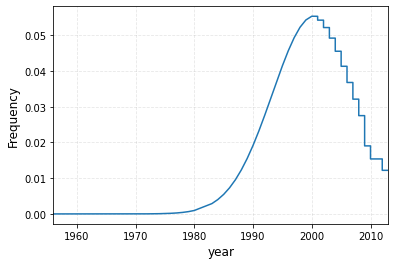

In [199]:
plt.plot(df["year"].sort_values(), pdf)
plt.xlim([1956,2013])  
plt.xlabel("year", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [200]:
df['year'].fillna(df['year'].mode()[0], inplace=True)

In [202]:
df['year']

0       2004.0
1       1998.0
2       1999.0
3       1999.0
4       2002.0
         ...  
3317    2002.0
3318    1992.0
3319    2002.0
3320    1992.0
3321    1992.0
Name: year, Length: 3322, dtype: float64

In [229]:
# applying query on the cleaned data year.
seats=list(df['seats'])
year=list(df['year'])
tnum=[]
tailnum=list(df['tailnum'])
for i in range(len(seats)):
    if year[i]>=2012 and (seats[i]>=150 and seats[i]<=190):
        tnum.append(tailnum[i])
pd.DataFrame(tnum,columns=['tailnum'])

,tailnum
0,N361VA
1,N849VA
2,N851VA
3,N852VA
4,N853VA
5,N854VA
6,N855VA


# question-8

In [219]:
manf=list(df['manufacturer'])
manum=[]
t_num=[]
seat_s=[]
for i in range(len(seats)):
    if seats[i]>390 and manf[i] in ['BOEING','AIRBUS','EMBRAER']:
        t_num.append(tailnum[i])
        manum.append(manf[i])
        seat_s.append(seats[i])
d=pd.DataFrame()
d['tailnum']=t_num
d['manufacturer']=manum
d['seats']=seat_s
d

,tailnum,manufacturer,seats
0,N206UA,BOEING,400
1,N228UA,BOEING,400
2,N272AT,BOEING,400
3,N57016,BOEING,400
4,N670US,BOEING,450
5,N77012,BOEING,400
6,N777UA,BOEING,400
7,N78003,BOEING,400
8,N78013,BOEING,400
9,N787UA,BOEING,400


# question -9

In [400]:
det_res = pd.concat([df['year'], df['seats']], join = 'outer', axis = 1)
det_res
res=df[det_res.columns].apply(lambda x : '&'.join(x.dropna().astype(str)),axis=1)
x=list(res.unique())
lst=[]
lst1=[]
for i in x:
    ind=i.index('&')
    lst.append(i[:ind])
    lst1.append(i[ind+1:])
yr=[]
sd=[]
p=[]
q=[]
for i in range(304):
    if float(lst[i])>=2012:
        yr.append(lst[i])
        sd.append(lst1[i])
for i in yr:
    p.append(i.split(".")[0])
for i in sd:
    q.append(i.split(".")[0])  
p=[int(i) for i in p]
q=[int(i) for i in q]
#print(p,q)
p.sort()
q.sort(reverse=True)
temp=pd.DataFrame()
temp['year']=p
temp['seats']=q
temp

,year,seats
0,2012,379
1,2012,379
2,2012,377
3,2012,377
4,2012,260
5,2012,222
6,2012,222
7,2012,200
8,2012,200
9,2012,199


# question -10

In [291]:
temp=pd.DataFrame()
temp['seats']=q
temp['year']=p
temp

,seats,year
0,379,2012
1,379,2012
2,377,2012
3,377,2012
4,260,2012
5,222,2012
6,222,2012
7,200,2012
8,200,2012
9,199,2012


# question -11

In [326]:
condition=df['seats'] > 200
res='manufacturer'
temp=df[condition].groupby(res)
print(temp.size())

manufacturer
AIRBUS               66
AIRBUS INDUSTRIE      4
BOEING              225
dtype: int64


# question -12

In [331]:
x=lambda group: len(group) > 10
temp=df.groupby(res).filter(x).groupby(res)
print(temp.size())

manufacturer
AIRBUS                            336
AIRBUS INDUSTRIE                  400
BOEING                           1630
BOMBARDIER INC                    368
EMBRAER                           299
MCDONNELL DOUGLAS                 120
MCDONNELL DOUGLAS AIRCRAFT CO     103
MCDONNELL DOUGLAS CORPORATION      14
dtype: int64


# question-13

In [343]:
filtered_df = df[df['seats'] > 200]
result_df = filtered_df.groupby('manufacturer').size().reset_index(name='count')
result_df = result_df[result_df['count'] > 10]
print(result_df)

  manufacturer  count
0       AIRBUS     66
2       BOEING    225


# question-14

In [369]:
condition=df[df['seats'] > 200]
x = condition.groupby('manufacturer').size().reset_index(name='howmany')
temp = x.sort_values('howmany', ascending=False)
print(temp)
#print(x)


       manufacturer  howmany
2            BOEING      225
0            AIRBUS       66
1  AIRBUS INDUSTRIE        4


# question-15

In [390]:
f=pd.read_csv(r"C:\Users\samba\OneDrive\Desktop\flights.csv")
air=pd.read_csv(r"C:\Users\samba\OneDrive\Desktop\OneDrive_2023-03-20\Data Wrangling Contest\airlines.csv")
air

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [392]:
cartail = f[['carrier', 'tailnum']].drop_duplicates()
planes_joined = pd.merge(cartail, df, on='tailnum', how='inner')
result_df = pd.merge(planes_joined, air, on='carrier', how='inner')
result_df = result_df[['tailnum', 'year', 'type', 'manufacturer', 'model', 'name', 'carrier']]
result_df

,tailnum,year,type,manufacturer,model,name,carrier
0,N14228,1999.0,Fixed wing multi engine,BOEING,737-824,United Air Lines Inc.,UA
1,N24211,1998.0,Fixed wing multi engine,BOEING,737-824,United Air Lines Inc.,UA
2,N39463,2012.0,Fixed wing multi engine,BOEING,737-924ER,United Air Lines Inc.,UA
3,N29129,1998.0,Fixed wing multi engine,BOEING,757-224,United Air Lines Inc.,UA
4,N53441,2001.0,Fixed wing multi engine,BOEING,737-924ER,United Air Lines Inc.,UA
...,...,...,...,...,...,...,...
3334,N760SK,2005.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,SkyWest Airlines Inc.,OO
3335,N766SK,2005.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,SkyWest Airlines Inc.,OO
3336,N772SK,2005.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,SkyWest Airlines Inc.,OO
3337,N776SK,2006.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,SkyWest Airlines Inc.,OO


# question-16

In [396]:
cartail = f[['carrier', 'tailnum']].drop_duplicates()
merged_df = pd.merge(pd.merge(cartail, df, on='tailnum'), air, on='carrier')
merged_df

,carrier,tailnum,year,type,manufacturer,model,engines,seats,speed,engine,name
0,UA,N14228,1999.0,Fixed wing multi engine,BOEING,737-824,2,149,0.0,Turbo-fan,United Air Lines Inc.
1,UA,N24211,1998.0,Fixed wing multi engine,BOEING,737-824,2,149,0.0,Turbo-fan,United Air Lines Inc.
2,UA,N39463,2012.0,Fixed wing multi engine,BOEING,737-924ER,2,191,0.0,Turbo-fan,United Air Lines Inc.
3,UA,N29129,1998.0,Fixed wing multi engine,BOEING,757-224,2,178,0.0,Turbo-jet,United Air Lines Inc.
4,UA,N53441,2001.0,Fixed wing multi engine,BOEING,737-924ER,2,191,0.0,Turbo-fan,United Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...
3334,OO,N760SK,2005.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2,80,0.0,Turbo-fan,SkyWest Airlines Inc.
3335,OO,N766SK,2005.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2,80,0.0,Turbo-fan,SkyWest Airlines Inc.
3336,OO,N772SK,2005.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2,80,0.0,Turbo-fan,SkyWest Airlines Inc.
3337,OO,N776SK,2006.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2,80,0.0,Turbo-fan,SkyWest Airlines Inc.


# question-17


In [398]:
weather=pd.read_csv(r"C:\Users\samba\OneDrive\Desktop\OneDrive_2023-03-20\Data Wrangling Contest\weather.csv")
weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,01-01-2013 01:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,01-01-2013 02:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,01-01-2013 03:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,01-01-2013 04:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,01-01-2013 05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,35.96,19.94,51.78,340.0,13.80936,15.891535,0.0,1017.1,10.0,30-12-2013 20:00
26126,LGA,2013,12,30,20,33.98,17.06,49.51,330.0,17.26170,19.864419,0.0,1018.8,10.0,30-12-2013 21:00
26127,LGA,2013,12,30,21,32.00,15.08,49.19,340.0,14.96014,17.215830,0.0,1019.5,10.0,30-12-2013 22:00
26128,LGA,2013,12,30,22,30.92,12.92,46.74,320.0,17.26170,19.864419,0.0,1019.9,10.0,30-12-2013 23:00


In [411]:
flights2 = f[f['origin'] == 'EWR'] # filitering the data that relevant to EWR in flights
l=['year', 'month', 'day']
dic={'temp': 'mean', 'humid': 'mean'}

In [412]:
weather2 = weather[weather['origin'] == 'EWR'].groupby(l).agg(dic).reset_index()
merged_df = pd.merge(flights2, weather2, on=l, how='left')
print(merged_df)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     554.0             558       -4.0     740.0   
2       2013      1    1     555.0             600       -5.0     913.0   
3       2013      1    1     558.0             600       -2.0     923.0   
4       2013      1    1     559.0             600       -1.0     854.0   
...      ...    ...  ...       ...             ...        ...       ...   
120830  2013      9   30    2142.0            2129       13.0    2250.0   
120831  2013      9   30    2149.0            2156       -7.0    2245.0   
120832  2013      9   30    2150.0            2159       -9.0    2250.0   
120833  2013      9   30    2211.0            2059       72.0    2339.0   
120834  2013      9   30    2233.0            2113       80.0     112.0   

        sched_arr_time  arr_delay carrier  ...  tailnum origin dest air_time  \
0                  